In [5]:
%load_ext lab_black

In [1]:
#pip install imbalanced-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [10]:
trk = pd.read_pickle("/media/lucas/QS/l1_nnt/trk_processed_25k.pkl")

In [11]:
trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry subentry                                                             
0     0         2.623967  1.301414 -0.289234   999.0 -0.878906         2   
      1         3.435026  0.566814 -0.159267   999.0  3.339844         2   
      2         3.774908  1.815973 -0.240375   999.0  4.921875         1   
      3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2   
      4         2.320653  1.837421  0.032604   999.0  4.980469         1   
...                  ...       ...       ...     ...       ...       ...   
24999 194       2.807081 -2.373757 -0.638281   999.0 -0.058594         2   
      195       2.472056 -2.244333 -0.792948   999.0  6.328125         2   
      196       2.391643 -2.093290 -0.658689   999.0 -0.410156         2   
      197       6.140490  2.403961 -0.539389   999.0 -7.441406         2   
      198       5.962409 -2.311289 -0.428627   999.0  1.640625         2   

                is_pv  
entry subentry         
0     0             0  
      1             0  
      2             1  
      3             0  
      4             1  
...               ...  
24999 194           0  
      195           0  
      196           0  
      197           0  
      198           0  

[4562536 rows x 7 columns]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    trk[["trk_pt", "trk_eta"]], trk["is_pv"], random_state=23, train_size=0.7
)

# oversampling to 1 means both categories have as many samples
oversample = RandomUnderSampler(sampling_strategy=1)

x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [14]:
y_train_over.value_counts()

0    485492
1    485492
Name: is_pv, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1, max_depth=5)

rf.fit(x_train_over, y_train_over)

RandomForestClassifier(max_depth=5, n_estimators=1)

In [16]:
from sklearn.metrics import accuracy_score

y_train_pred = rf.predict(x_train_over)
y_test_pred = rf.predict(x_test)


print(
    "accuracy train: ",
    accuracy_score(y_train_over, y_train_pred),
    "\n accuracy test: ",
    accuracy_score(y_test, y_test_pred),
)

accuracy train:  0.6181553969993326 
 accuracy test:  0.508054364494605


In [17]:
unique, counts = np.unique(y_train_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 332365]
 [     1 638619]]


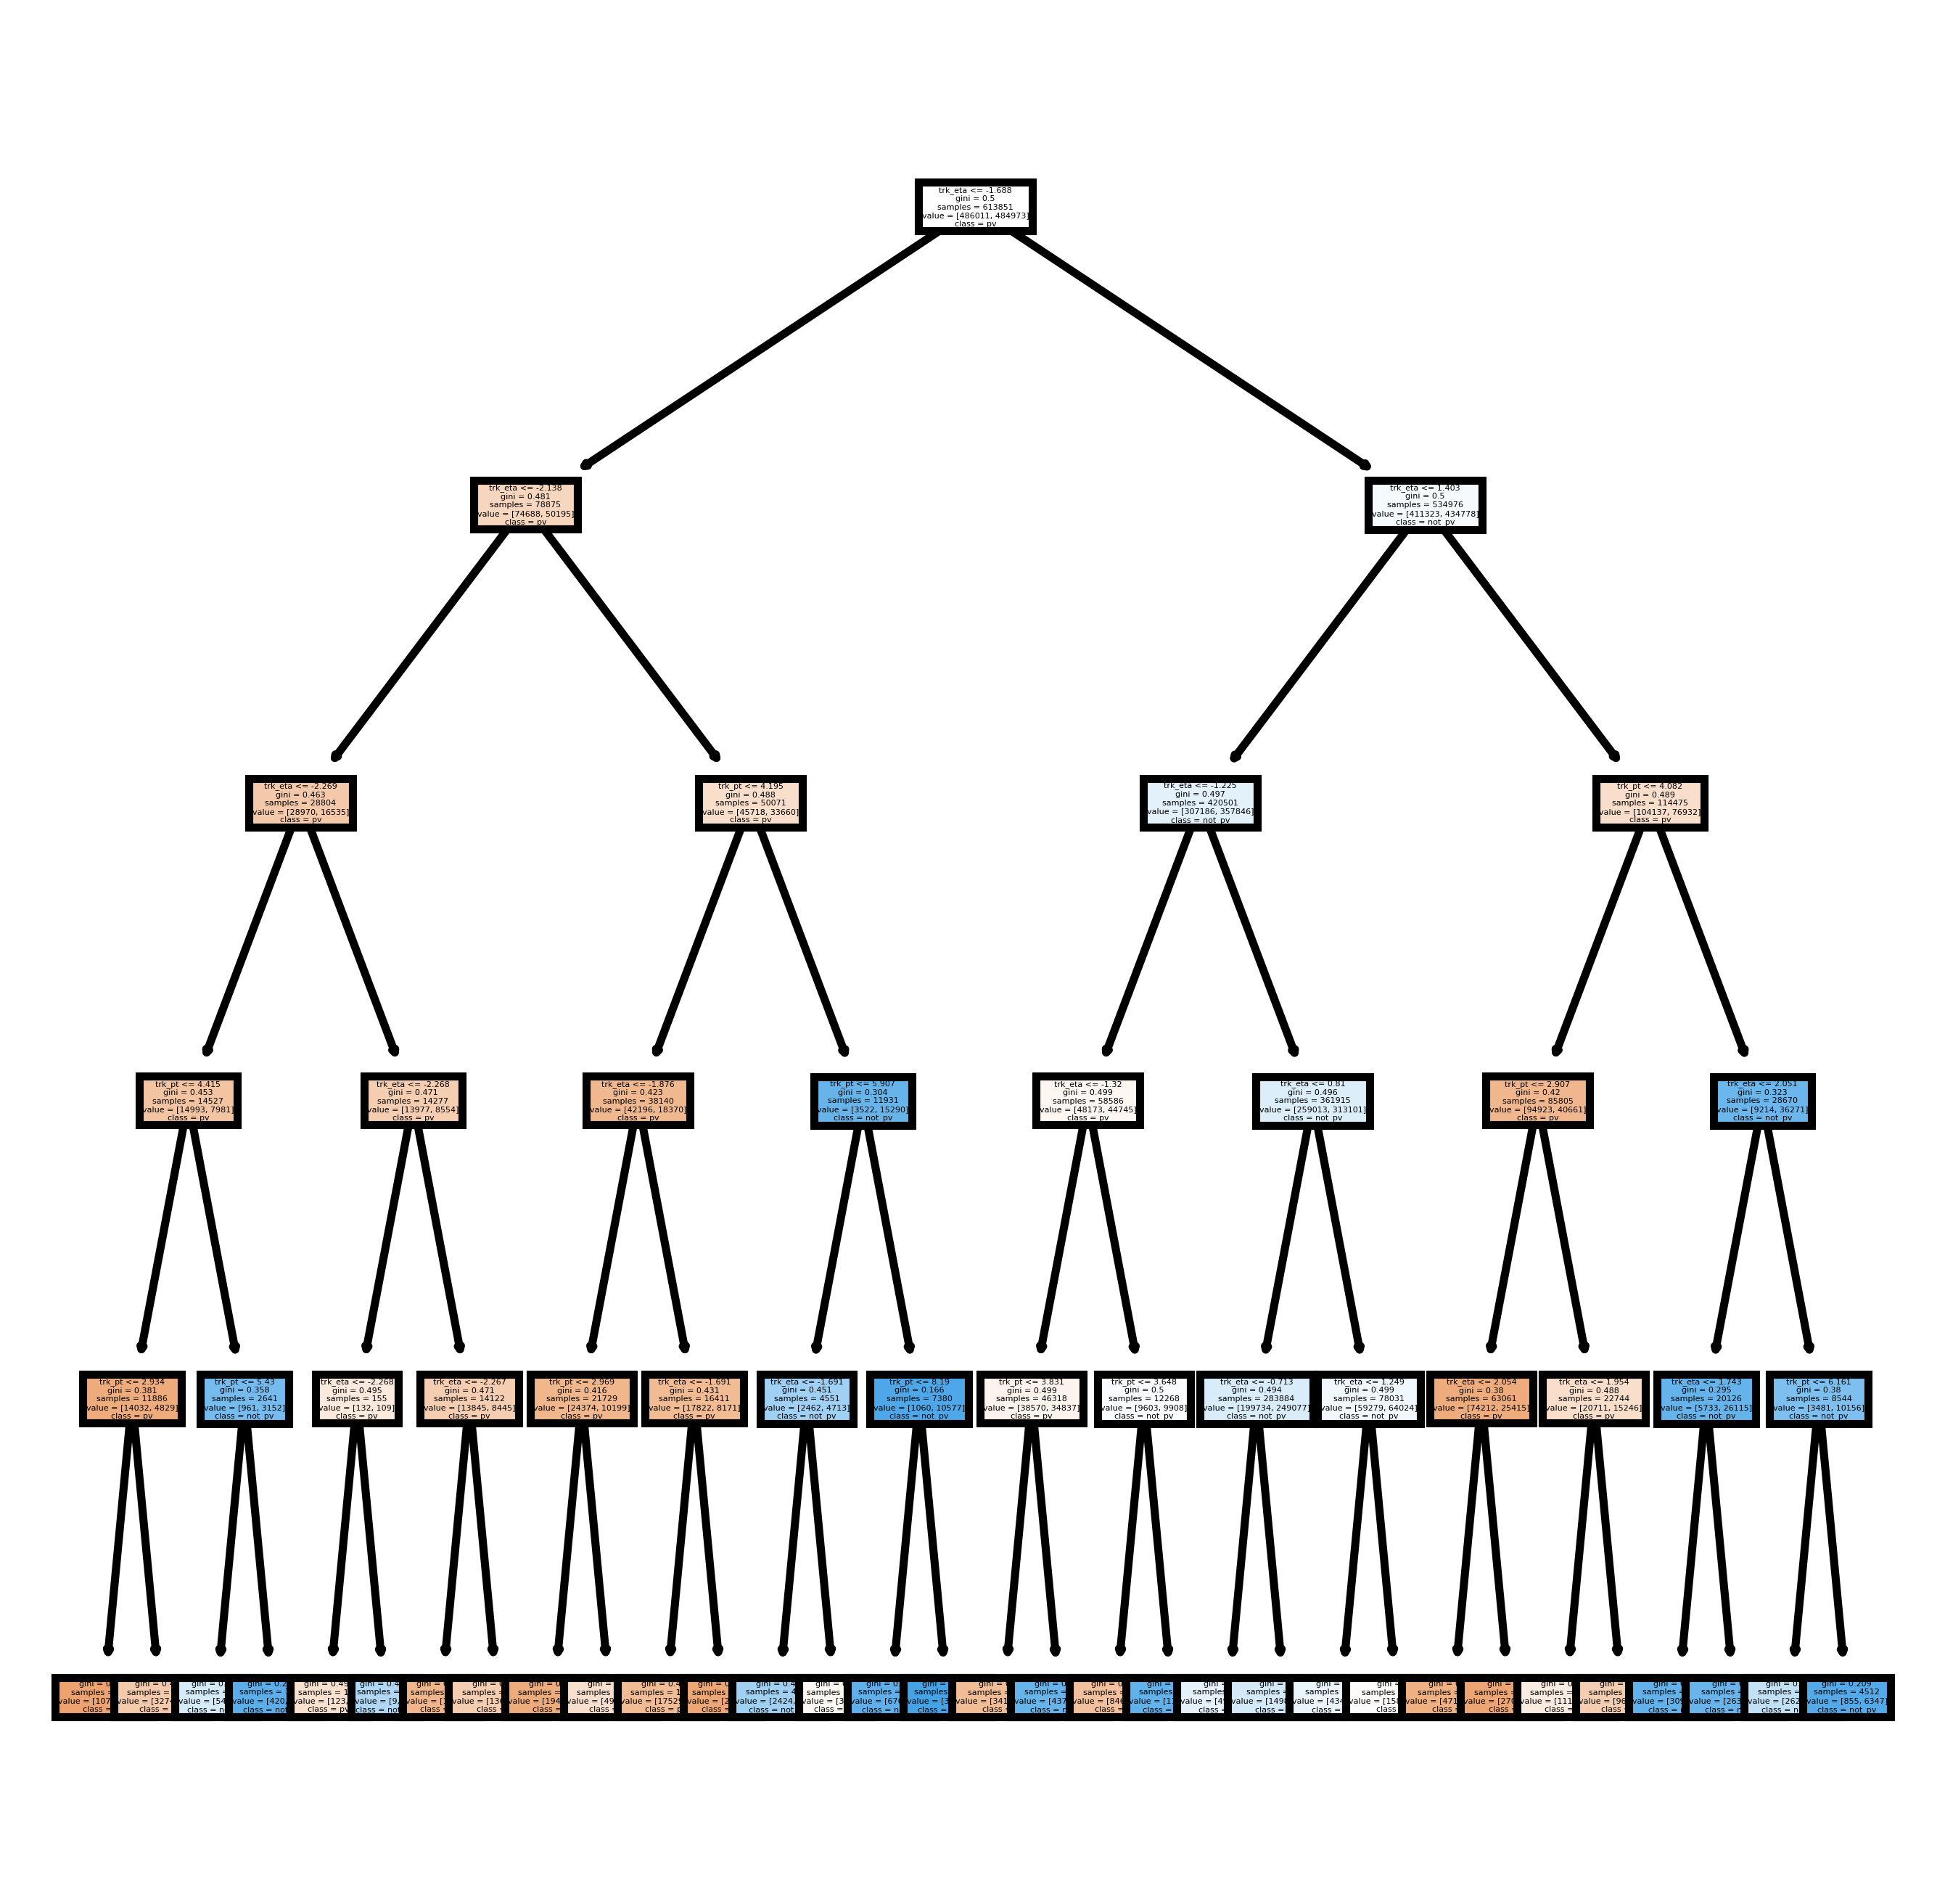

In [18]:
# estimator = rf.estimators_[0]
from sklearn import tree

from sklearn.tree import export_graphviz

fn = ["trk_pt", "trk_eta"]
cn = ["pv", "not_pv"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(rf.estimators_[0], feature_names=fn, class_names=cn, filled=True)
fig.savefig("rf_individualtree.png")

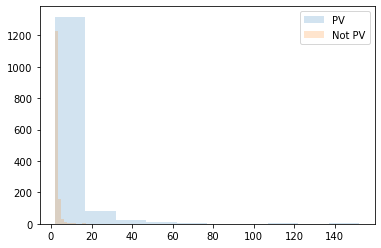

In [26]:
plt.hist(X_over.loc[np.where(y_over==1)[0]], alpha=0.2, label='PV')
plt.hist(X_over.loc[np.where(y_over==0)[0]], alpha=0.2, label='Not PV')
plt.legend()

In [27]:
trues = X_over.loc[np.where(y_over==1)[0]]

trues[trues['trk_pt'] > 5]

,trk_pt
1452,11.259640
1453,13.912287
1454,18.565226
1460,7.098469
1461,5.014456
...,...
2880,5.200002
2881,12.253868
2883,27.012177
2884,15.769894


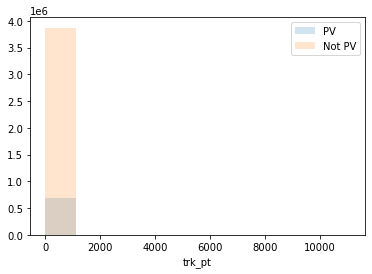

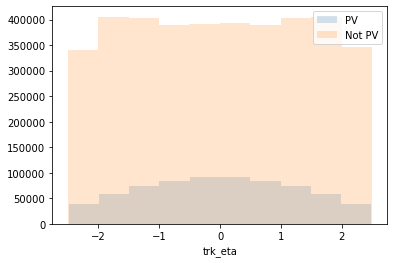

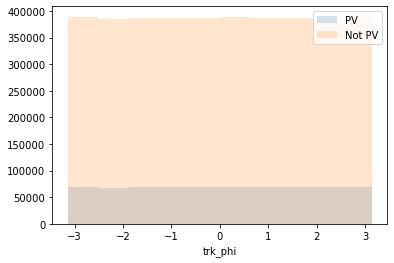

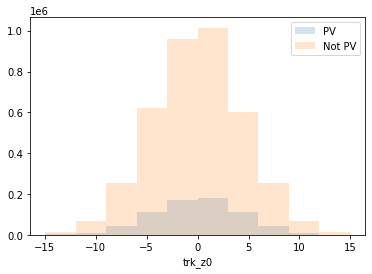

In [28]:
features = ['trk_pt', 'trk_eta', 'trk_phi', 'trk_z0']
for i in range(4): 
    plt.hist(trk[trk['is_pv']==1][features[i]], alpha =0.2,  label='PV')
    plt.hist(trk[trk['is_pv']==0][features[i]], alpha =0.2,  label='Not PV')
    plt.legend()
    plt.xlabel(features[i])
    plt.show() 

In [17]:
trk[trk['is_pv']==1]['trk_pt']

2           3.774908
4           2.320653
50          2.584265
52          4.013740
53          2.251015
             ...    
4562503    10.395136
4562504    19.375227
4562505    23.722233
4562508     8.187319
4562512     2.526053
Name: trk_pt, Length: 693566, dtype: float64

# Explainability

In [19]:
import shap

In [20]:
exp = shap.TreeExplainer(rf)

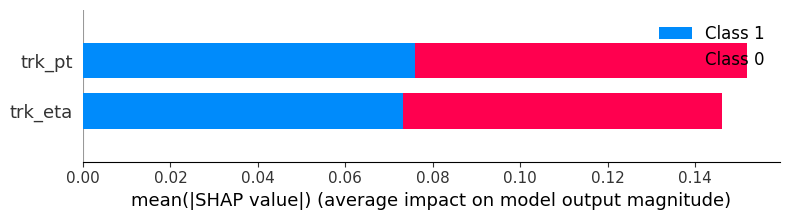

In [21]:
shap.summary_plot(exp.shap_values(x_train_over), x_train_over)

In [23]:
y_train

entry  subentry
12683  31          0
20493  115         0
1739   119         0
23053  100         0
10447  178         0
                  ..
9443   11          0
15885  130         1
11934  98          0
8043   96          0
10103  80          1
Name: is_pv, Length: 3193775, dtype: int64

In [27]:
y_train_over

0         0
1         0
2         0
3         0
4         0
         ..
970979    1
970980    1
970981    1
970982    1
970983    1
Name: is_pv, Length: 970984, dtype: int64

In [35]:
instance = x_train_over.iloc[9]

In [36]:
shap_values = exp.shap_values(instance)

In [37]:
shap.initjs()
shap.force_plot(exp.expected_value[1], shap_values[1], instance)